# Final Projects: Calculating evolutionary distance

In this notebook you will compare the amino acid sequence of hemoglobin alpha from 3 different species to find out which two are most closely related.

You'll need to copy and paste the function from last class that finds the number of differences in two sequences:

In [14]:
def DNAFunc(DNA):
    RNAdict = {"A":"U","T":"A","G":"C","C":"G"}
    s = ""
    for base in DNA:
        s += RNAdict[base]
    return s

In [15]:
def aminoacid(condon):
    amino_acids_list = {"UUU":"F", "UUC":"F", "UUA":"L", "UUG":"L", "CUU":"L", "CUC":"L", "CUA":"L", "CUG":"L", "AUU":"I", "AUC":"I", "AUA":"I", "AUG":"M", "GUU":"V", "GUC":"V", "GUA":"V", "GUG":"V", "UCU":"S", "UCC":"S", "UCA":"S", "UCG":"S", "CCU":"P", "CCC":"P", "CCA":"P", "CCG":"P", "ACU":"T", "ACC":"T", "ACA":"T", "ACG":"T", "GCU":"A", "GCC":"A", "GCA":"A", "GCG":"A", "UAU":"Y", "UAC":"Y", "UAA":"X", "UAG":"X", "CAU":"H", "CAC":"H", "CAA":"Q", "CAG":"Q", "AAU": "N", "AAC":"N", "AAA":"K", "AAG":"K", "GAU":"D", "GAC":"D", "GAA":"E", "GAG":"E", "UGU":"C", "UGC":"C", "UGA":"X", "UGG":"W", "CGU":"R", "CGC":"R", "CGA":"R", "CGG":"R", "AGU":"S", "AGC":"S", "AGA":"R", "AGG":"R", "GGU":"G", "GGC":"G", "GGA":"G", "GGG":"G"} 
    con = ""
    prote = ""
    for base in condon:
        con += base
        if len(con) ==3:
            prote += amino_acids_list[con]
            con = ""
    return prote

In [16]:
def difFun(b1, b2):
    difFun = 0
    for i, aa in enumerate(b1):
        if b2[i] != aa:
            difFun += 1
    print("There are",difFun,"differences")

In order to compare the different amino acid sequences, we need to open the files and read the sequences into new variables:

In [17]:
DNA_H = open("5_hedgehog_CYTB_DNA.txt").read()
DNA_M = open("5_mouse_CYTB_DNA.txt").read()
DNA_R = open("5_rabbit_CYTB_DNA.txt").read()
print(len(DNA_H))
print(len(DNA_M))
print(len(DNA_R))

1140
1140
1140


In [18]:
print(DNA_H)

TACGATTTATAAGCTTTTTATGTAGGTGATAATTTTTAACAATTATTAAGAGAGTAACTGAATGGGTGGGGAAGTTTGTAAAGAAGAACTACTTTGAAACCAAGTAATGATCCGGACACGAATTAATAAGTTTAGTGATGTCCGAATAAAGATCGGTATGTAATGTGACGTCTATGTGAGAGTCGTAAAAGTAGTCATAGGGTATAAACGGCTCTGCATTTAATGCCGACTGATTAGGCGATGAATGTGCGATTACCACGGAGTTATAAAAAATAGACGAATAAATATGTGTAACCTGCTCCGTAAATAATACCTAGAATGAATAAATTTCTTTGTACTTTATAACCTTAATAAGATAATTAATGGTGTTATCGATGTCGTAAATATCCTATACATGATGGTACTCCCGTCTATAGAAAGACTCCACGATGTCAATAGTGTTTGAATAATAGACGATAGGGGATGTAGCCTTGTCTAAATCAAGTTACTTAGACTCCTCGTAAAAGTCATCTATTTCGATGGGATTGTGCAAAAAAGCGTGAAGTAAAGTAGGAAGGAAAATATTAATATCGTAATTGTTATTAAGTGGATAATAAGGAAGTACTTTGGCCGAGATTATTGGGTTGTCCTTAATAGAGTCTTAGACTTTTTTAAGGTAAGGTAGGAATAATATGATAATTTCTGTAAAATCCATATTAGAATGATTAATATTATAATTGATAGAATTGTGATAAAAGGGGTCTGAATAATTCGCTGGGTCTGTTAATATGGGGTCGATTAGGAAATTTATGGGGAGGAGTATAATTTGGACTTACTATGAAAAATAAACGGATACGTTAAGAGGCTAGATAGGGATTGTTTGAACCTCCTCATTATCGTGATAAATATAGATAAGAATAGAATAAGAAGTATGGGGATAATGTATGAAGATTTGTTGCTTCGTATTATAAGGCTGGGGATTCGGTTACGTAAAAGACTTAAGATTAGAGTCTAAATGATT

In [19]:
print(DNA_M)

TACTGTTAGTATGCTTTTAGTGTGGGTGATAATTTCTAGTAATTGGTGAGGAAGTAGCTAGATGGGCGGGGAAGGTTGTAAAGTAGTACTACTTTGAAACCCAGAGACGATCCTTAGACGGATTATCAGGTTTAGGAGTGTCCGGATAAGAATCGATATGTGATGTGTAGTCTGTGTTATTGTCGGAAGAGTAGTCATTGTGTATAGACGGCTCTACATTTGATACCTACTAATTAGGCTATAAATGTGCGGTTGCCTCGGAGGTATAAGAAATAGACGGATAAGAATGTGCATCCTGCCCCCTACATGATGCCTAGAATATGTAAGTATCTTTGTACTTTATAACCTCAATAAGATAATAAACGTCATTATCGGTGACGTAAATATCCAATACAAGAAGGTACTCCTGTTTATAGTAAAACTCCTCGATGTCATTAGTGTTTGGAAGATAGTCGGTAAGGTATACATCCTTGGTGAAATCATCTTACTTAGACTCCGCCTAAGAGTCATCTATTCCGGTGGGATTGAGCTAAAAAGCGAAAGGTGAAATAGGATGGTAAGTAATAACGTCGTGATCATTAACAGGTGGAGGAAAAGGAAGTGCTTTGTCCTAGGTTATTGGGGTGTCCGGAATTGAGACTGCGGCTGTTTTAGGGTAAAGTGGGAATGATATGGTAGTTTCTGTAGGATCCACAGGATTATTATAAGGATAAAGAATATTGAGATCAAGAAAAGAAGGGTCTGTATGATCCTCTAGGACTATTAATATATGGTCGGTTGGGTGATTTGTGTGGTGGAGTATAGTTCGGTCTTGCTATAAAGAATAAACGTATACGGTAGGATGCAAGTTAGGGGTTATTTGATCCTCCTCAGGATCGGGATTAAAATAGGTAGAATTAGGATCGGGATGAGGGTAAAGAGGTATGTAGGTTTGTTGCTTCGGATTATAAGGCGGGTTAGTGGGTTCGAGATATGACTTAAGAACATCAGTTGGATGACT

In [20]:
print(DNA_R)

TACTGGTTGTAAGCGTTTTGGGTGGGGGATAATTTTTAACAATTGGTGAGGGATTAACTGGAAGGACGAGGTAGTTTGTAGAGACGGACTACTTTGAAACCGAGAGATGATCCGGACACGGAATATTAAGTTTAAAAGTGACCGGATAAGAATCGGTATGTGATGTGGAGACTGTGTTGTTGTCGTAAGAGTAGTCATTGGGTATAAACGGCTCTACAATTGATACCGACTGAATAGGCTATGGAGGTGCGATTGCCTCGTAGATATAAGAAATAAACGGAGATGTATGTGCATCCGGCGCCTTAGATGATACCTAGTATGTGTATGGATCTCTGGACTTTGTAACCGTAGTAGGAGGATAAGCGTCATTATCGGTGTCGTAAATAGCCAATACAGGAGGGTACTCCTGTTTATAGTAATACCCCTCGTTGGCATTAGTGATTGGAGGATAGTCGTTAGGGTATATAGCCTTGTTGGAATCAACTTACTTAGACTCCTCCTAAAAGTCAACTATTTCGGTGAGAATGGGCTAAGAAGCGAAAAGTGAAGTAGAACGGTAAATAGTAACGTTGAAATCAGAATTAAGTGGAGGAGAAAGATGTACTTTGACCGAGGTTGTTGGGTTGTCCTTAAGGAAGTTTGAGTCTATTTTAGGGAAAGGTGGGGATGATGTGTTAGTTTCTGTGGGATCCAAAGGAACATCGGTAAGAAGAGGAGGAATAAAATCAGGATAAAAGTGGTCTGGATAATCCTCTGGGTCTGTTGATGTGGGGACGGTTGGGGGAATTATGGGGAGGGGTATAGTTTGGTCTTACTATGAAAGATAAACGGATGCGATAGGATGCGAGATAAGGTTTATTTGAGCCTCCTCAGGATCGAGATCAGGATAGGTAGGAACAAGATCGGAAGTAGGGTAAGGAAGTATACAGATTTGTTGCATCGTACTATAAGGCTGGGTAATCAGTTCAGGATAAGACTCAAGAGCAGCGTCTAGAAGAGT

Decide as a group whether you want to compare DNA or protein sequences for your species. What are the pros and cons of each?

In [21]:
# If you choose to use the transcribe and translate functions, you can copy and paste them here


Now call the number of differences function 3 times to compare all three of your species' sequences.

In [22]:
pro_H = aminoacid(DNAFunc(DNA_H))
pro_M = aminoacid(DNAFunc(DNA_M))
pro_R = aminoacid(DNAFunc(DNA_R))
print(len(pro_H ))
print(len(pro_M ))
print(len(pro_R ))

380
380
380


In [23]:
print(pro_H)


MLNIRKIHPLLKIVNNSLIDLPTPSNISSXXNFGSLLGLCLIIQITTGLFLAIHYTADTLSAFSSVSHICRDVNYGXLIRYLHANGASIFFICLFIHIGRGIYYGSYLFKETXNIGIILLITTIATAFIGYVLPXGQISFXGATVITNLLSAIPYIGTDLVQXIXGAFSVDKATLTRFFALHFILPFIIIALTIIHLLFLHETGSNNPTGIISESEKIPFHPYYTIKDILGIILLIIILTILTLFSPDLLSDPDNYTPANPLNTPPHIKPEXYFLFAYAILRSIPNKLGGVIALFISILILFFIPLLHTSKQRSIIFRPLSQCIFXILISDLLILTXIGSQPVENPYIIIGQLASVFYFFIILILIPLSGLIENHIFKXR


In [27]:
print(pro_M)


MTIIRKSHPLLKIINHSFIDLPAPSNISSXXNFGSLLGICLIVQILTGLFLAIHYTSDTITAFSSVTHICRDVNYGXLIRYLHANGASIFFICLFLHVGRGMYYGSYTFIETXNIGVILLFAVIATAFIGYVLPXGQISFXGATVITNLLSAIPYVGTTLVEXIXGGFSVDKATLTRFFAFHFILPFIIAALVIVHLLFLHETGSNNPTGLNSDADKIPFHPYYTIKDILGVLIIFLFLITLVLFFPDILGDPDNYIPANPLNTPPHIKPERYFLFAYAILRSIPNKLGGVLALILSILILALLPFLHTSKQRSLIFRPITQALYXILVVNLLILTXIGGQPVEHPFIIIGQLASISYFTIIVILIPIAGIIEDKLLKLY


In [28]:
print(pro_R)

MTNIRKTHPLLKIVNHSLIDLPAPSNISAXXNFGSLLGLCLIIQIFTGLFLAIHYTSDTTTAFSSVTHICRDVNYGXLIRYLHANGASIFFICLYIHVGRGIYYGSYTYLETXNIGIILLFAVIATAFIGYVLPXGQISLWGATVITNLLSAIPYIGTTLVEXIXGGFSVDKATLTRFFAFHFILPFIIATLVLIHLLFLHETGSNNPTGIPSNSDKIPFHPYYTIKDTLGFLVAILLLLILVLFSPDLLGDPDNYTPANPLNTPPHIKPEXYFLFAYAILRSIPNKLGGVLALVLSILVLAFIPFLHMSKQRSMIFRPISQVLFXVLVADLLTLTXIGGQPVEHPFITIGQVASVLYFSTILILIPLASLIENKILKXR


What can you conclude based on the number of differences between each pair of species?

Next, create a function that returns the percent difference between sequences and call it for your three comparisons:

In [26]:
def difFun(b1, b2):
    difFun = 0
    for i, aa in enumerate(b1):
        if b2[i] != aa:
            difFun += 1
    print("There are",difFun,"differences")


Let's visualize these results! Choose a graph type that you think will communicate your conclusions effectively and create it using matplotlib:

In [30]:
import matplotlib.pyplot as plt

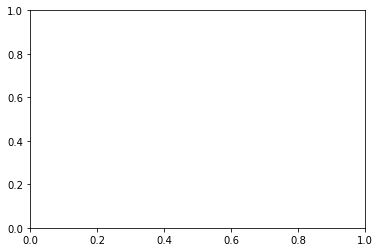

## Coding Challenge
If you finish your project and want to try a challenge, come up with a hypothesis about which of the following species are most closely related to humans (carp, chicken, chimp, dog, eel, elephant, frog, gorilla, macaque monkey, mouse, orangutan, pig). Write out a ranked list with the species you think is most related to humans at the top.

Then calculate the percent difference between the hemoglobin amino acid sequences of humans and each species to find out how close you came to the right ranking!